<a href="https://colab.research.google.com/github/4lparslan/HousingPricePrediction_ML_Bootcamp/blob/main/GlobalAiHub_ML_Bootcamp_Doga_Alp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries


In [1]:
!pip install catboost
! pip install kaggle
import numpy as np
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import scipy.stats as stats
from sklearn.linear_model import Lasso,Ridge,ElasticNet,LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
import catboost as cb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.4 MB/s eta 0:00:00


# Data Import

**Please import your Kaggle API key as 'kaggle.json' before running the code below.**

In [2]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d anthonypino/melbourne-housing-market
!unzip melbourne-housing-market.zip -d melbourne-housing-market
os.remove("melbourne-housing-market.zip")

  0% 0.00/2.28M [00:00<?, ?B/s]
100% 2.28M/2.28M [00:00<00:00, 147MB/s]
Archive:  melbourne-housing-market.zip
  inflating: melbourne-housing-market/MELBOURNE_HOUSE_PRICES_LESS.csv  
  inflating: melbourne-housing-market/Melbourne_housing_FULL.csv  


In [3]:
data = pd.read_csv("melbourne-housing-market/Melbourne_housing_FULL.csv")
df=data.copy()
df.head(5)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


# Observing Data

In [4]:
df.shape

(34857, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [6]:
df.isna().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [7]:
df["Rooms"]=df["Rooms"].astype(float)

# Data Analysis

**Duplicated satırları silelim.**

In [8]:
df.drop_duplicates(inplace=True)

1 Adet tekrar eden satırımız olduğundan 34856 veri kaldı.

In [9]:
df.shape

(34856, 21)

Descriptive Statistics

In [10]:
round((df.describe().T),2)

,count,mean,std,min,25%,50%,75%,max
Rooms,34856.0,3.03,0.97,1.00,2.00,3.00,4.00,16.00
Price,27247.0,1050173.34,641467.13,85000.00,635000.00,870000.00,1295000.00,11200000.00
Distance,34855.0,11.18,6.79,0.00,6.40,10.30,14.00,48.10
Postcode,34855.0,3116.06,109.03,3000.00,3051.00,3103.00,3156.00,3978.00
Bedroom2,26639.0,3.08,0.98,0.00,2.00,3.00,4.00,30.00
Bathroom,26630.0,1.62,0.72,0.00,1.00,2.00,2.00,12.00
Car,26128.0,1.73,1.01,0.00,1.00,2.00,2.00,26.00
Landsize,23046.0,593.61,3398.92,0.00,224.00,521.00,670.00,433014.00
BuildingArea,13741.0,160.25,401.28,0.00,102.00,136.00,188.00,44515.00
YearBuilt,15550.0,1965.29,37.33,1196.00,1940.00,1970.00,2000.00,2106.00


Bağımlı değişkendeki nan değerleri drop edersek daha iyi sonuç alabiliriz.

In [11]:
df.dropna(subset = ['Price'],inplace=True)
df.reset_index(drop=True,inplace=True)
df.shape

(27247, 21)

Geriye 27427 satır verimiz kaldı fakat halen diğer değişkenlerde nan değerler var.

# Categorical or Numerical Seperation

In [12]:
print(df.select_dtypes(['object']).columns)
obj_cats = ['Suburb', 'Address', 'Type', 'Method', 'SellerG', "Date", 'CouncilArea','Regionname']
for colname in obj_cats:
    df[colname] = df[colname].astype('category')
num_cats = ['Postcode']
for colname in num_cats:
    df[colname] = df[colname].astype('category')
df.info()

Index(['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea',
       'Regionname'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27247 entries, 0 to 27246
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Suburb         27247 non-null  category
 1   Address        27247 non-null  category
 2   Rooms          27247 non-null  float64 
 3   Type           27247 non-null  category
 4   Price          27247 non-null  float64 
 5   Method         27247 non-null  category
 6   SellerG        27247 non-null  category
 7   Date           27247 non-null  category
 8   Distance       27246 non-null  float64 
 9   Postcode       27246 non-null  category
 10  Bedroom2       20806 non-null  float64 
 11  Bathroom       20800 non-null  float64 
 12  Car            20423 non-null  float64 
 13  Landsize       17982 non-null  float64 
 14  BuildingArea   10656 non-null  float64 
 1

Yaptığım araştırmalara göre Rooms ve Bedroom2 değişkenleri aynı değerleri içeriyor arasındaki farkı alıp çok fark yok ise sadece 1 değişkeni tutmamız modelin sağlığı için daha iyi olacaktır.

In [13]:
df['Rooms v Bedroom2'] = df['Rooms'] - df['Bedroom2']
df["Rooms v Bedroom2"].head(10)


0    0.0
1    0.0
2    0.0
3    0.0
4    1.0
5    0.0
6   -1.0
7    0.0
8    NaN
9    NaN
Name: Rooms v Bedroom2, dtype: float64

In [14]:
df = df.drop(['Bedroom2','Rooms v Bedroom2'],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27247 entries, 0 to 27246
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Suburb         27247 non-null  category
 1   Address        27247 non-null  category
 2   Rooms          27247 non-null  float64 
 3   Type           27247 non-null  category
 4   Price          27247 non-null  float64 
 5   Method         27247 non-null  category
 6   SellerG        27247 non-null  category
 7   Date           27247 non-null  category
 8   Distance       27246 non-null  float64 
 9   Postcode       27246 non-null  category
 10  Bathroom       20800 non-null  float64 
 11  Car            20423 non-null  float64 
 12  Landsize       17982 non-null  float64 
 13  BuildingArea   10656 non-null  float64 
 14  YearBuilt      12084 non-null  float64 
 15  CouncilArea    27244 non-null  category
 16  Lattitude      20993 non-null  float64 
 17  Longtitude     20993 non-null  

# Imputing Missing Values (NaN)

Kategorik değişkenleri mode ile nümerik değişkenleri ise median ile doldurdum ve geriye NaN değer kalmadı.

In [15]:
categorical_columns=df.iloc[:,[0,1,3,5,6,7,9,15,18]]
numerical_columns=df.iloc[:,[4,2,8,10,11,12,13,14,16,17,19]]
for column in categorical_columns:
    df[column] = df[column].fillna(df[column].mode().iloc[0])
for column in numerical_columns:
    df[column] = df[column].fillna(df[column].median())
df.isna().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

# Clear Outliers

Öncelikle descriptive istatistiklere tekrar bakıp hangi değişkenlerin en çok outlier içerdiğine bakalım.


In [16]:
round((df.describe().T),2)

,count,mean,std,min,25%,50%,75%,max
Rooms,27247.0,2.99,0.95,1.00,2.00,3.0,4.00,16.00
Price,27247.0,1050173.34,641467.13,85000.00,635000.00,870000.0,1295000.00,11200000.00
Distance,27247.0,11.28,6.79,0.00,6.40,10.5,14.00,48.10
Bathroom,27247.0,1.45,0.66,0.00,1.00,1.0,2.00,9.00
Car,27247.0,1.79,0.87,0.00,1.00,2.0,2.00,18.00
Landsize,27247.0,565.78,3052.55,0.00,351.00,512.0,592.00,433014.00
BuildingArea,27247.0,142.32,281.16,0.00,133.00,133.0,133.00,44515.00
YearBuilt,27247.0,1968.50,24.54,1196.00,1970.00,1970.0,1970.00,2019.00
Lattitude,27247.0,-37.81,0.08,-38.19,-37.84,-37.8,-37.77,-37.40
Longtitude,27247.0,145.00,0.11,144.42,144.95,145.0,145.05,145.53


Landsize, Building Area ve YearBuilt (1196=Outlier) değişkenlerinde outlier olduğunu görüyoruz.

Z Skor metoduna göre artı eksi 3 standart sapmanın dışında kalanları seçili değişkenlerden silelim.

In [17]:
def find_outliers(col):
    z=np.abs(stats.zscore(col))
    idx_outliers=np.where(z>3,True,False)
    return pd.Series(idx_outliers,index=col.index)
idx=find_outliers(df["Landsize"])
idx2=find_outliers(df["BuildingArea"])
idx3=find_outliers(df["YearBuilt"])
a=df.loc[idx]
b=df.loc[idx2]
c=df.loc[idx3]
d=pd.concat([a,b,c],join="inner")
df.drop(d.index, inplace = True)
df.reset_index(drop=True,inplace=True)
(round((df.describe().T),2))

,count,mean,std,min,25%,50%,75%,max
Rooms,26696.0,2.99,0.95,1.00,2.00,3.0,4.00,16.00
Price,26696.0,1037745.04,627554.06,85000.00,631000.00,861000.0,1276000.00,11200000.00
Distance,26696.0,11.39,6.74,0.00,6.60,10.5,14.00,48.10
Bathroom,26696.0,1.45,0.66,0.00,1.00,1.0,2.00,9.00
Car,26696.0,1.80,0.86,0.00,1.00,2.0,2.00,18.00
Landsize,26696.0,511.48,430.48,0.00,367.00,512.0,593.00,9338.00
BuildingArea,26696.0,139.76,53.43,0.00,133.00,133.0,133.00,958.00
YearBuilt,26696.0,1970.07,21.40,1895.00,1970.00,1970.0,1970.00,2019.00
Lattitude,26696.0,-37.81,0.08,-38.19,-37.84,-37.8,-37.76,-37.40
Longtitude,26696.0,145.00,0.11,144.42,144.95,145.0,145.05,145.53


Outlier değerlerden kurtulmuş olduk.

# Label Encoding for Categorical Variables

In [18]:
le=LabelEncoder()
df.iloc[:,[0,1,3,5,6,7,9,15,18]]=df.iloc[:,[0,1,3,5,6,7,9,15,18]].apply(le.fit_transform)

<ipython-input-18-c59435447ffc>:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:,[0,1,3,5,6,7,9,15,18]]=df.iloc[:,[0,1,3,5,6,7,9,15,18]].apply(le.fit_transform)


# Data Visualization

Histogram

<Axes: xlabel='Price', ylabel='Count'>

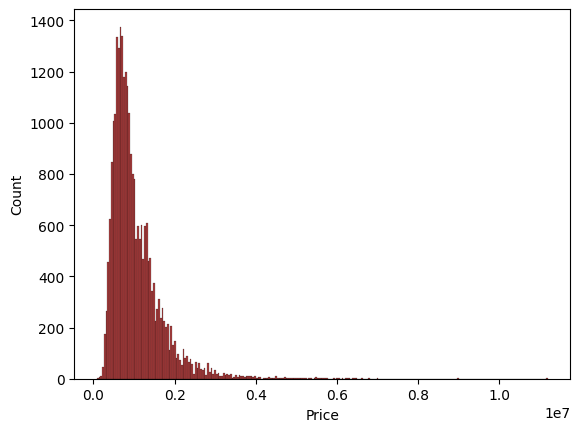

In [19]:
sns.histplot(df, x="Price",color="darkred")

Histograma baktığımızda Price değişkeninin yani bağımlı değişkenimizin sağdan çarpık olduğunu görüyoruz.

Pair Plot for Numerical Variables

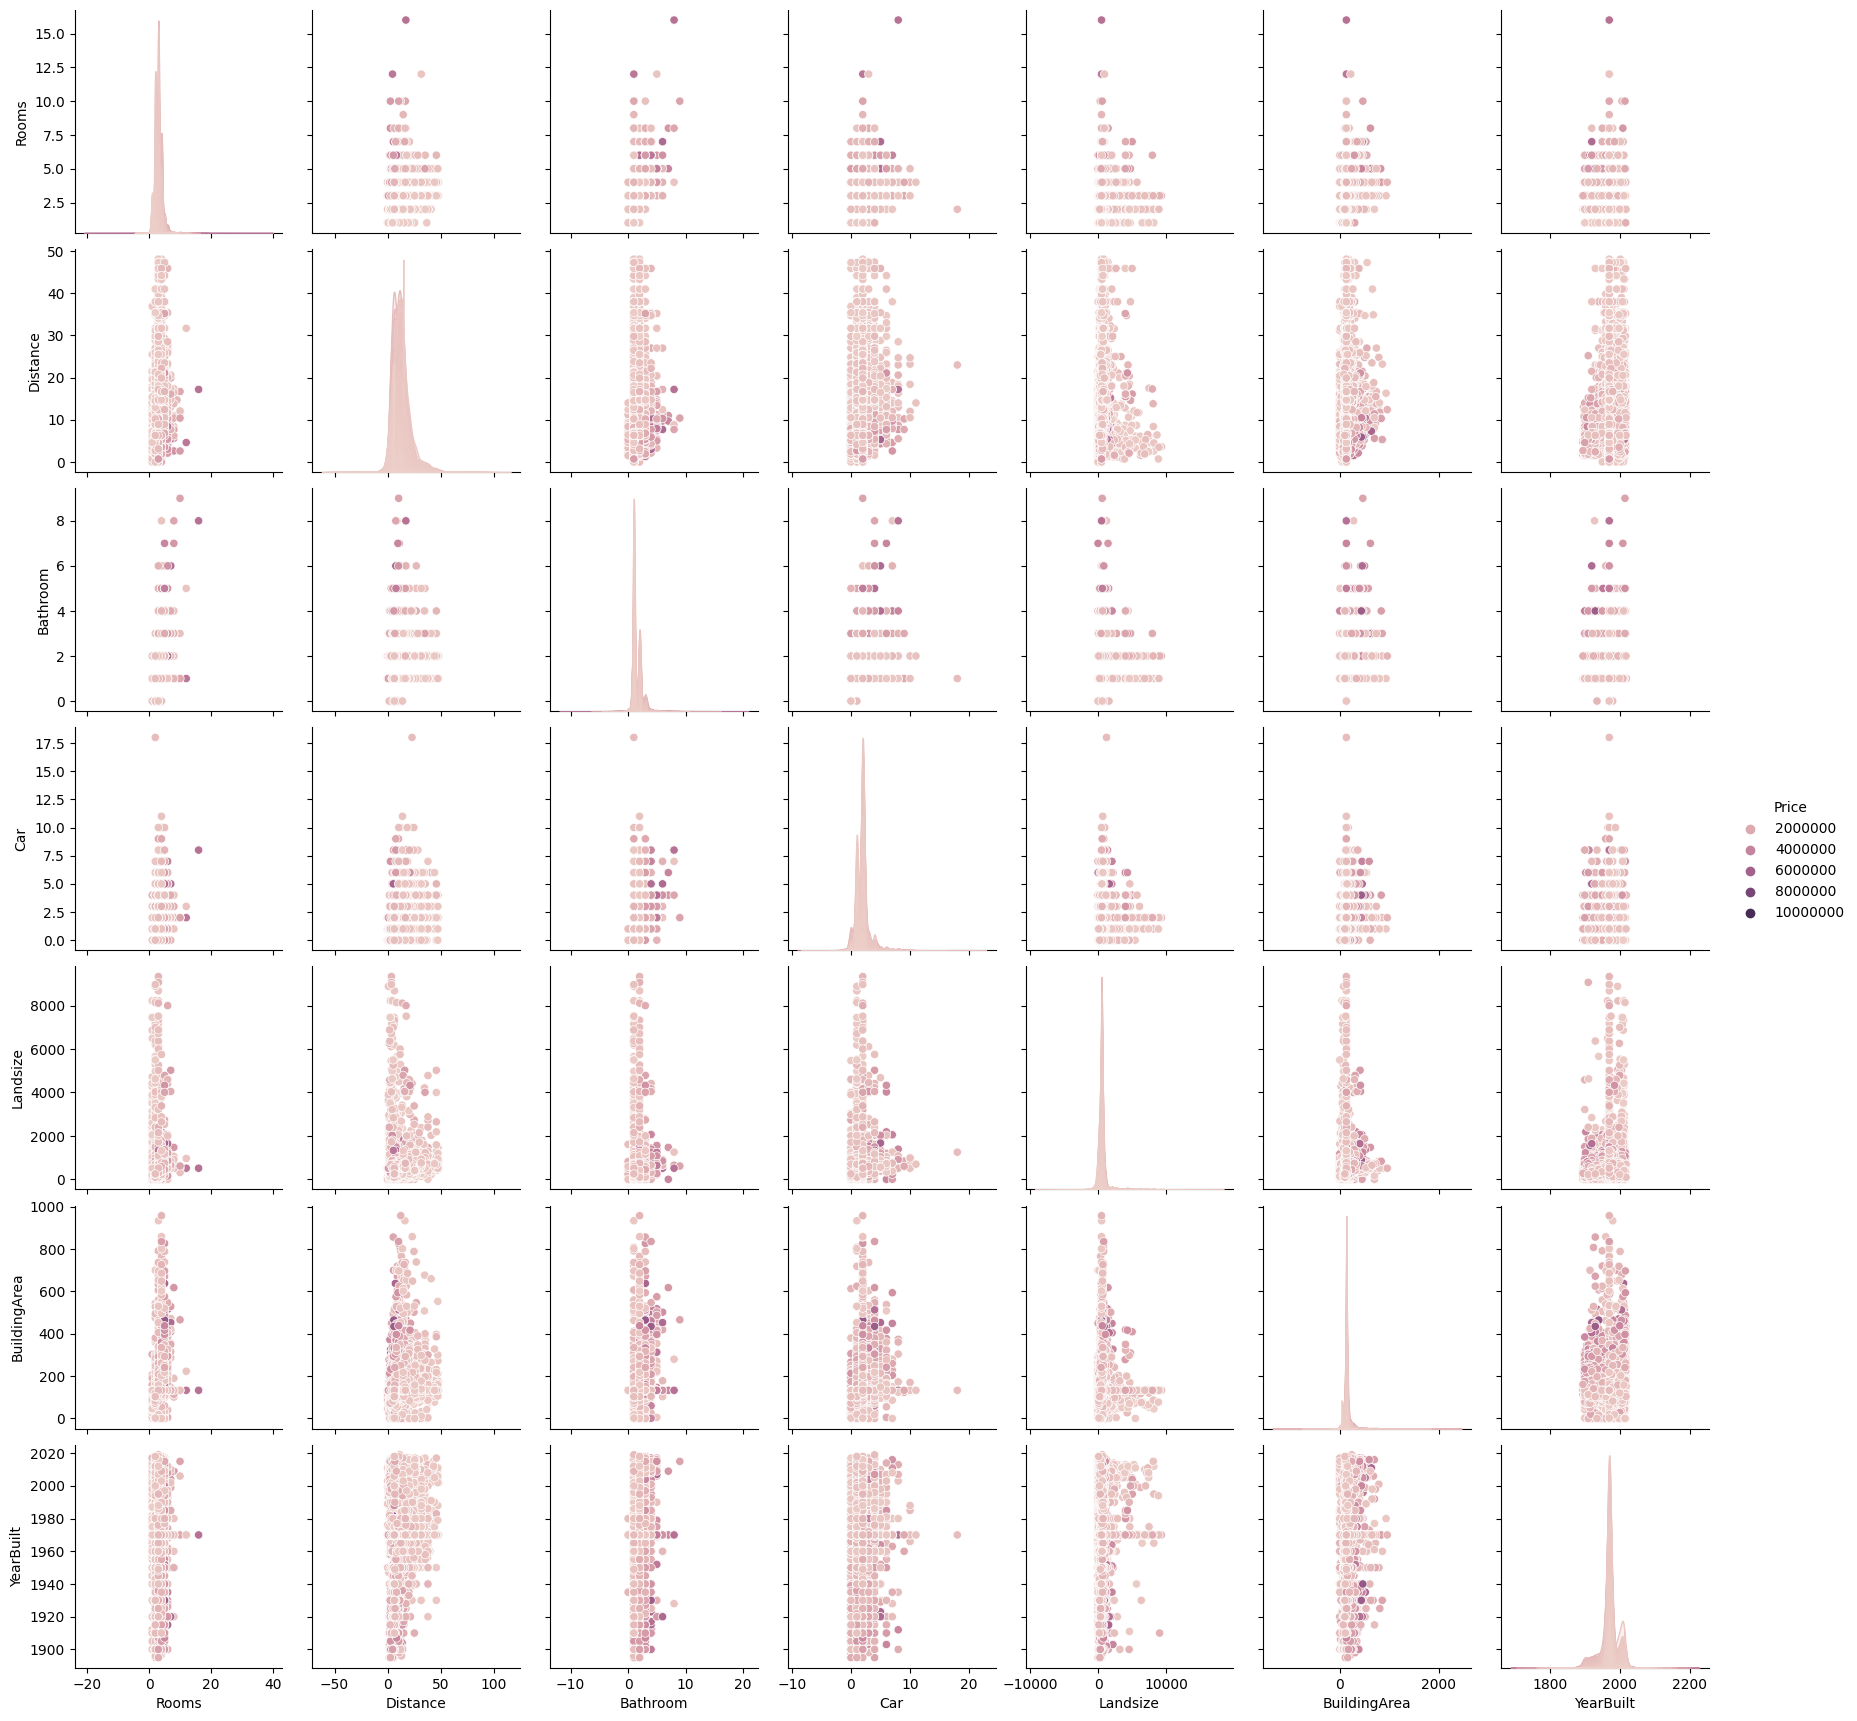

In [20]:
sns.pairplot(df, vars=["Rooms","Distance","Bathroom","Car","Landsize","BuildingArea","YearBuilt"],hue="Price")

Correlation Matrix (Heatmap)

<Axes: >

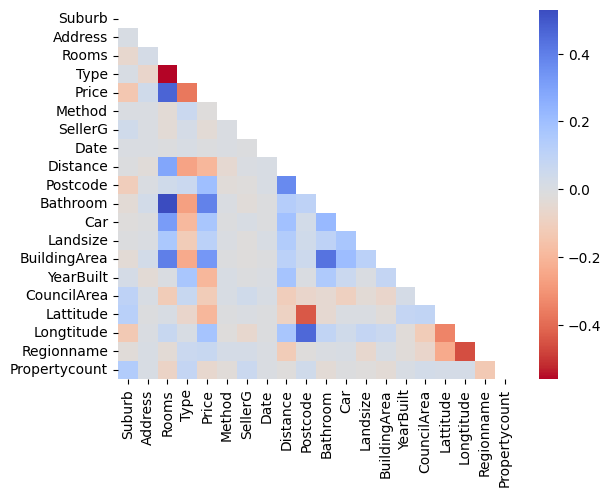

In [21]:
mask = np.triu(np.ones_like(df.corr()))
sns.heatmap(round(df.corr(),2), cmap="coolwarm_r", annot=False, mask=mask)

# Train Test Split

In [22]:
df.head(5)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,0,25126,2.0,0,1480000.0,1,32,60,2.5,53,1.0,1.0,202.0,133.0,1970.0,31,-37.7996,144.9984,2,4019.0
1,0,11944,2.0,0,1035000.0,1,32,63,2.5,53,1.0,0.0,156.0,79.0,1900.0,31,-37.8079,144.9934,2,4019.0
2,0,19494,3.0,0,1465000.0,3,32,64,2.5,53,2.0,0.0,134.0,150.0,1900.0,31,-37.8093,144.9944,2,4019.0
3,0,18050,3.0,0,850000.0,0,32,64,2.5,53,2.0,1.0,94.0,133.0,1970.0,31,-37.7969,144.9969,2,4019.0
4,0,21005,4.0,0,1600000.0,4,206,65,2.5,53,1.0,2.0,120.0,142.0,2014.0,31,-37.8072,144.9941,2,4019.0


Address Satırında encode ettikten sonra yaklaşık 27000 veri farklı kategori olduğu için veriden drop ettiğimizde daha iyi sonuç alacağız.

In [23]:
X=df.drop(["Price","Address"],axis=1)
y=df["Price"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=30)

# Regression Models Dictionary


In [30]:
import xgboost as xgb

In [37]:
models = {
    'Lasso': Lasso(),
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'ElasticNet': ElasticNet(),
    'KNeighborsRegressor': KNeighborsRegressor(),
    'AdaBoostRegressor': AdaBoostRegressor(n_estimators=5, learning_rate=1.2, loss='exponential', random_state=2),
    'GradientBoostingRegressor': GradientBoostingRegressor(),
    'RandomForestRegressor': RandomForestRegressor(),
    'XGBRegressor': xgb.XGBRegressor(objective='reg:squarederror', random_state=42, learning_rate=0.03, n_estimators=150, max_depth=9),
    'CatBoostRegressor': cb.CatBoostRegressor(metric_period=100)
}


# Training and Evaluation Metrics

In [38]:
model_names = []
r2_scores = []

for model_name, model_instance in models.items():
    print(f"-----{model_name}-----")

    model_instance.fit(X_train, y_train)
    y_pred = model_instance.predict(X_test)

    mae = round(mean_absolute_error(y_test, y_pred), 2)
    mse = round(mean_squared_error(y_test, y_pred, squared=True), 2)
    rmse = round(mean_squared_error(y_test, y_pred, squared=False), 2)
    r2 = round(r2_score(y_test, y_pred), 2)

    model_names.append(model_name)
    r2_scores.append(r2)

    print("MAE Score: ", mae)
    print("MSE Score: ", mse)
    print("RMSE Score: ", rmse)
    print("R-Squared Score: ", r2)
    print("\n")

-----Lasso-----
MAE Score:  264431.48
MSE Score:  159553934596.8
RMSE Score:  399442.03
R-Squared Score:  0.58


-----LinearRegression-----
MAE Score:  264431.85
MSE Score:  159553893463.64
RMSE Score:  399441.98
R-Squared Score:  0.58


-----Ridge-----
MAE Score:  264426.82
MSE Score:  159555437760.79
RMSE Score:  399443.91
R-Squared Score:  0.58


-----ElasticNet-----
MAE Score:  270194.24
MSE Score:  172953193627.33
RMSE Score:  415876.42
R-Squared Score:  0.54


-----KNeighborsRegressor-----
MAE Score:  278137.9
MSE Score:  206475756886.03
RMSE Score:  454396.04
R-Squared Score:  0.45


-----AdaBoostRegressor-----
MAE Score:  297327.29
MSE Score:  178611446694.51
RMSE Score:  422624.47
R-Squared Score:  0.53


-----GradientBoostingRegressor-----
MAE Score:  185105.64
MSE Score:  93060672331.9
RMSE Score:  305058.47
R-Squared Score:  0.75


-----RandomForestRegressor-----
MAE Score:  165874.48
MSE Score:  81358700572.34
RMSE Score:  285234.47
R-Squared Score:  0.78


-----XGBRegress

# Models Comparison

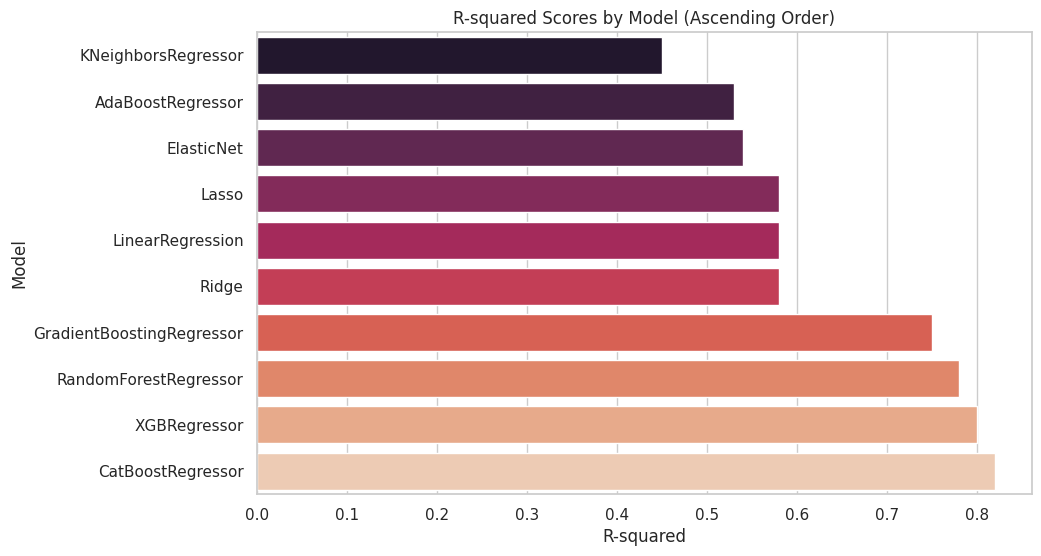

In [39]:
results = pd.DataFrame({'Model': model_names, 'R-squared': r2_scores})
results = results.sort_values(by='R-squared', ascending=True)

plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
ax = sns.barplot(x='R-squared', y='Model', data=results, palette="rocket")
ax.set(xlabel="R-squared", ylabel="Model")
plt.title("R-squared Scores by Model (Ascending Order)")
plt.show()